In [1254]:
import pandas as pd
import numpy as np

In [1255]:
# Load csv data file
data = pd.read_csv('data/i4talent.csv')
data.head()

,WerknemerID,datum,geboortedatum,indiensttreding_datum,uitdiensttreding_datum,leeftijd,lengte_dienst,stad,afdeling,klant_id,geslacht_id,geslacht,uitdiensttreding_reden,uitdiensttreding_type,STATUS_JAAR,STATUS,BUSINESS_UNIT
0,6962,2018-12-31 05:06:00,1989-06-26 05:06:00,2013-05-23 05:06:00,1905-01-01 05:06:00,29.0,5.0,Amstelveen,BI,30,V,Vrouw,Niet van toepassing,Niet van toepassing,2018,Actief,Detachering
1,6212,2016-12-30 05:06:00,1983-08-25 05:06:00,2010-04-24 05:06:00,1905-01-01 05:06:00,33.0,6.0,Utrecht,Accountant,21,M,Man,Niet van toepassing,Niet van toepassing,2016,Actief,Detachering
2,5325,2018-12-31 05:06:00,1976-04-24 05:06:00,2006-06-09 05:06:00,1905-01-01 05:06:00,42.0,12.0,Amsterdam,BI,42,V,Vrouw,Niet van toepassing,Niet van toepassing,2018,Actief,Detachering
3,8193,2018-12-31 05:06:00,1998-10-26 05:06:00,2018-04-28 05:06:00,1905-01-01 05:06:00,20.0,NaN,Utrecht,BI,21,V,Vrouw,Niet van toepassing,Niet van toepassing,2018,Actief,Detachering
4,5926,2013-12-31 05:06:00,1981-03-19 05:06:00,2009-01-09 05:06:00,1905-01-01 05:06:00,32.0,4.0,Den Haag,Accountant,18,M,Man,Niet van toepassing,Niet van toepassing,2013,Actief,Detachering


In [1256]:
data.shape

(49753, 17)

# Exploratory Data Analysis

In [1257]:
# data.dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49753 entries, 0 to 49752
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   WerknemerID             49753 non-null  int64  
 1   datum                   49753 non-null  object 
 2   geboortedatum           49753 non-null  object 
 3   indiensttreding_datum   49753 non-null  object 
 4   uitdiensttreding_datum  49753 non-null  object 
 5   leeftijd                44653 non-null  float64
 6   lengte_dienst           44802 non-null  float64
 7   stad                    44210 non-null  object 
 8   afdeling                44688 non-null  object 
 9   klant_id                49753 non-null  int64  
 10  geslacht_id             49753 non-null  object 
 11  geslacht                49753 non-null  object 
 12  uitdiensttreding_reden  49753 non-null  object 
 13  uitdiensttreding_type   49753 non-null  object 
 14  STATUS_JAAR             49753 non-null

In [1258]:
# Remove all duplicate rows
data.drop_duplicates(inplace=True)

In [1259]:
# Find number of missing values for each column
data.isna().sum()

WerknemerID                  0
datum                        0
geboortedatum                0
indiensttreding_datum        0
uitdiensttreding_datum       0
leeftijd                  5100
lengte_dienst             4951
stad                      5543
afdeling                  5065
klant_id                     0
geslacht_id                  0
geslacht                     0
uitdiensttreding_reden       0
uitdiensttreding_type        0
STATUS_JAAR                  0
STATUS                       0
BUSINESS_UNIT                0
dtype: int64

In [1260]:
# Set WerknemerID as index
data.set_index('WerknemerID', inplace = True)

In [1261]:
print("Total number of rows:", len(data))
print("Number of rows with any missing value:", data.isna().any(axis=1).sum(), "\n")

print("Total number of WerknemerIDs", len(data.index.unique()))
print("Number of WerknemerIDs with any missing value", len(data.loc[data.isna().any(axis=1)].index.unique()))

Total number of rows: 49721
Number of rows with any missing value: 17671 

Total number of WerknemerIDs 6284
Number of WerknemerIDs with any missing value 5726


In [1262]:
# Examine all rows for one WerknemerID
data.loc[2008]

,datum,geboortedatum,indiensttreding_datum,uitdiensttreding_datum,leeftijd,lengte_dienst,stad,afdeling,klant_id,geslacht_id,geslacht,uitdiensttreding_reden,uitdiensttreding_type,STATUS_JAAR,STATUS,BUSINESS_UNIT
WerknemerID,,,,,,,,,,,,,,,,
2008,2020-12-30 05:06:00,1957-10-23 05:06:00,1996-08-31 05:06:00,1905-01-01 05:06:00,63.0,NaN,NaN,NaN,5,V,Vrouw,Niet van toepassing,Niet van toepassing,2020,Actief,Detachering
2008,2012-12-30 05:06:00,1957-10-23 05:06:00,1996-08-31 05:06:00,1905-01-01 05:06:00,55.0,16.0,Haarlem,Financial controller,5,V,Vrouw,Niet van toepassing,Niet van toepassing,2012,Actief,Detachering
2008,2011-12-31 05:06:00,1957-10-23 05:06:00,1996-08-31 05:06:00,1905-01-01 05:06:00,54.0,15.0,Haarlem,Financial controller,5,V,Vrouw,Niet van toepassing,Niet van toepassing,2011,Actief,Detachering
2008,2017-12-31 05:06:00,1957-10-23 05:06:00,1996-08-31 05:06:00,1905-01-01 05:06:00,60.0,21.0,Haarlem,Financial controller,5,V,Vrouw,Niet van toepassing,Niet van toepassing,2017,Actief,Detachering
2008,2015-12-31 05:06:00,1957-10-23 05:06:00,1996-08-31 05:06:00,1905-01-01 05:06:00,58.0,19.0,Haarlem,Financial controller,5,V,Vrouw,Niet van toepassing,Niet van toepassing,2015,Actief,Detachering
2008,2019-12-31 05:06:00,1957-10-23 05:06:00,1996-08-31 05:06:00,1905-01-01 05:06:00,NaN,23.0,Haarlem,Financial controller,5,V,Vrouw,Niet van toepassing,Niet van toepassing,2019,Actief,Detachering
2008,2018-12-31 05:06:00,1957-10-23 05:06:00,1996-08-31 05:06:00,1905-01-01 05:06:00,61.0,22.0,Haarlem,Financial controller,5,V,Vrouw,Niet van toepassing,Niet van toepassing,2018,Actief,Detachering
2008,2016-12-30 05:06:00,1957-10-23 05:06:00,1996-08-31 05:06:00,1905-01-01 05:06:00,59.0,20.0,Haarlem,NaN,5,V,Vrouw,Niet van toepassing,Niet van toepassing,2016,Actief,Detachering
2008,2014-12-31 05:06:00,1957-10-23 05:06:00,1996-08-31 05:06:00,1905-01-01 05:06:00,57.0,18.0,Haarlem,NaN,5,V,Vrouw,Niet van toepassing,Niet van toepassing,2014,Actief,Detachering


We see that there are multiple rows for each WerknemerID, with some missing values. We found before that leeftijd, lengte_dienst, stad and afdeling are the only columns with missing values. We can calculate leeftijd and lengte_dienst by using the columns datum, geboortedatum, indiensttreding_datum and uitdiensttreding_datum. For the missing values in columns stad and afdeling, we will simply find their values in other rows with the same WerknemerID index. We will do so in the next section.

## Filling in missing data

In [1263]:
# Change date strings to type Timestamp
cols = ['datum', 'geboortedatum', 'indiensttreding_datum', 'uitdiensttreding_datum']
data[cols] = data[cols].apply(pd.to_datetime, errors='raise')
# data.dtypes # Check

#### Column 'leeftijd'

In [1264]:
# Condition:
is_na = data['leeftijd'].isna() # leeftijd has missing value

# Calculate leeftijd and add to data set
leeftijd_days = data.loc[is_na, 'datum'] - data.loc[is_na, 'geboortedatum']
leeftijd_years = np.floor(leeftijd_days / pd.Timedelta(365.2422, 'days')) # number of full years (rounded down)

data.loc[is_na, 'leeftijd'] = leeftijd_years

#### Column 'lengte_dienst'

In [1265]:
# If STATUS is Actief -> lengte_dienst_v2 = indiensttreding_datum - datum
# If STATUS is Beëindigd -> lengte_dienst_v2 = indiensttreding_datum - uitdiensttreding_datum

# Conditions:
is_na = data['lengte_dienst'].isna() # lengte_dienst has missing value
active = data['STATUS'] == 'Actief' # Status is active
nonactive = data['STATUS'] == 'Beëindigd' # Status is nonactive

# Calculate lengte_dienst for active employees and add to data set
ld_active_days = data.loc[is_na&active, 'datum'] - data.loc[is_na&active, 'indiensttreding_datum']
ld_active_years = np.floor(ld_active_days / pd.Timedelta(365.2422, 'days')) # number of full years (rounded down)
data.loc[is_na&active, 'lengte_dienst'] = ld_active_years

# Calculate lengte_dienst for nonactive employees and add to data set
ld_nonactive_days = data.loc[is_na&nonactive, 'uitdiensttreding_datum'] - data.loc[is_na&nonactive, 'indiensttreding_datum']
ld_nonactive_years = np.floor(ld_nonactive_days / pd.Timedelta(365.2422, 'days')) # number of full years (rounded down)
data.loc[is_na&nonactive, 'lengte_dienst'] = ld_nonactive_years

#### Column 'stad'

In [1266]:
# Find WerknemerIDs that have more than one distinct value for a column
def ids_mult_col_vals(column):
    
    # All unique cities (stad) per WerknemerID (not counting missing stad values)
    vals_per_id = data.dropna(subset=[column]).groupby(['WerknemerID'])[column].unique()

    # Check if there are employees that have lived in multiple cities.
    ids_with_mult_vals = []
    for werknemer_id, vals in zip(vals_per_id.index, vals_per_id):
        if len(vals) > 1:
            ids_with_mult_vals.append(werknemer_id)
            
    return vals_per_id, ids_with_mult_vals

cities_per_id, ids_with_mult_cities = ids_mult_col_vals('stad')
print("Number of WerknemerIDs with more than one city: ", len(ids_with_mult_cities))

Number of WerknemerIDs with more than one city:  0


We can see that there are no employees that have lived in more than one city. Therefore, we can simply copy the city value from any of the rows for a particular WerknemerID.

In [1267]:
# Get first element of list of cities for each WerknemerID (as there is only one in each list)
city_per_id = cities_per_id.map(lambda x: x[0])

# Update missing values with city per WerknemerID
data.update(city_per_id, overwrite = False)

print("Number of rows with missing value for 'stad':", data['stad'].isna().sum())
print("Number of WerknemerIDs with missing values for 'stad':", len(data.loc[data['stad'].isna()].index.unique()))

Number of rows with missing value for 'stad': 645
Number of WerknemerIDs with missing values for 'stad': 93


The remaining 107 employees with missing values for the column 'stad' have no value for 'stad' in any row. This means that we cannot fill in these missing data.

#### Column 'afdeling'

In [1268]:
departments_per_id, ids_with_mult_departments = ids_mult_col_vals('afdeling')
print("Number of WerknemerIDs with more than one department: ", len(ids_with_mult_departments))

Number of WerknemerIDs with more than one department:  0


Again, we can see that there are no employees that have worked for more than one department. Therefore, we can simply copy the department value from any of the rows for a particular WerknemerID.

In [1269]:
# Get first element of list of cities for each WerknemerID (as there is only one in each list)
department_per_id = departments_per_id.map(lambda x: x[0])

# Update missing values with city per WerknemerID
data.update(department_per_id, overwrite = False)

print("Number of rows with missing value for 'afdeling':", data['afdeling'].isna().sum())
print("Number of WerknemerIDs with missing values for 'afdeling':", len(data.loc[data['afdeling'].isna()].index.unique()))

Number of rows with missing value for 'afdeling': 116
Number of WerknemerIDs with missing values for 'afdeling': 29


The remaining 29 employees with missing values for the column 'stad' have no value for 'stad' in any row. This means that we cannot fill in these missing data.

## Removing (more) duplicates
It could be that by filling in missing values, we have created more duplicates. Therefore, we have to check whether this happened and in case it did, drop the duplicates. To do this, we must first reset the index, because otherwise we might find duplicates that in fact have a different WerknemerID.

In [1270]:
data.reset_index(inplace = True)
data.drop_duplicates(inplace = True)
data.set_index('WerknemerID', inplace = True)

## Remaining missing values

In [1271]:
print("Number of rows with any missing value:", data.isna().any(axis=1).sum())
print("Number of WerknemerIDs with any missing value", len(data.loc[data.isna().any(axis=1)].index.unique()))

Number of rows with any missing value: 755
Number of WerknemerIDs with any missing value 116


In [1272]:
# Remove missing values for now
data.dropna(inplace = True)

## Only keep the latest status updates 
We don't need to do this if we're only going to keep nonactive employees in the data set.

In [1273]:
# Find the latest status date for each WerknemerID
# latest_date_per_id = data.groupby(['WerknemerID'])['datum'].max()

# Find intersection of original data set and lates date per WerknemerID
# data = data.merge(latest_date_per_id, how = 'inner', on = ['WerknemerID', 'datum'])

## Only keep nonactive employees
We want to keep only the nonactive employees, because we cannot learn anything about the outflow of employees from employees that are still active.

In [1274]:
data = data.loc[data['STATUS'] == 'Beëindigd']

In [1275]:
print("Total number of rows:", len(data))
print("Number of rows with any missing value:", data.isna().any(axis=1).sum(), "\n")

print("Total number of WerknemerIDs", len(data.index.unique()))
print("Number of WerknemerIDs with any missing value", len(data.loc[data.isna().any(axis=1)].index.unique()))

Total number of rows: 1432
Number of rows with any missing value: 0 

Total number of WerknemerIDs 1432
Number of WerknemerIDs with any missing value 0


## Add indiensttreding_leeftijd
If we want to predict the duration of service of an employee, it is more logical to use the age at which they start working as input for our model, rather than the age at which they stop working, as we do not know this in advance.

In [1276]:
# Rename column 'leeftijd' to 'uitdiensttreding_leeftijd'
data.rename(columns = {'leeftijd':'uitdiensttreding_leeftijd'}, inplace = True)

# Calculate indiensttreding_leeftijd and add to data set
leeftijd_days = data['indiensttreding_datum'] - data['geboortedatum']
leeftijd_years = np.floor(leeftijd_days / pd.Timedelta(365.2422, 'days')) # number of full years (rounded down)

data['indiensttreding_leeftijd'] = leeftijd_years

## Examine variables

In [1277]:
data[['indiensttreding_leeftijd', 'uitdiensttreding_leeftijd', 'lengte_dienst']].describe()

,indiensttreding_leeftijd,uitdiensttreding_leeftijd,lengte_dienst
count,1432.000000,1432.000000,1432.000000
mean,39.304469,51.452514,11.393855
std,12.061085,16.424419,6.685815
min,18.000000,19.000000,0.000000
25%,26.000000,34.000000,7.000000
50%,40.000000,60.000000,13.000000
75%,51.000000,65.000000,13.000000
max,51.000000,65.000000,25.000000


In [1278]:
data['stad'].value_counts(dropna = False)

Amsterdam              297
Rotterdam              177
Den Haag               103
Utrecht                 66
Rijswijk                59
Zoetermeer              59
Dordrecht               54
Woerden                 46
Eindhoven               44
Middelburg              42
Almere                  41
Haarlem                 34
Zaandam                 33
Barendrecht             32
Breda                   32
Schiedam                31
Alblasserdam            28
Tilburg                 28
Capelle                 26
Alphen aan den Rijn     26
Leiden                  26
Veenendaal              24
Delft                   22
Amstelveen              22
Zeist                   19
Lelystad                17
Hoogeveen               15
Roermond                11
Gouda                   11
Pijnacker                7
Name: stad, dtype: int64

In [1279]:
data['afdeling'].value_counts(dropna = False)

Financial controller         374
Boekhouder                   343
BI                           249
Accountant                   194
Business analist             110
Credit controller             93
Project controller            31
Administratief medewerker      9
HR                             6
Marketing                      6
Business development           5
IT                             5
Office manager                 4
Legal                          3
Name: afdeling, dtype: int64

In [1280]:
data['geslacht_id'].value_counts(dropna = False)

V    889
M    543
Name: geslacht_id, dtype: int64

In [1281]:
data['geslacht'].value_counts(dropna = False)

Vrouw    889
Man      543
Name: geslacht, dtype: int64

In [1282]:
data['uitdiensttreding_reden'].value_counts(dropna = False)

Pensioen    851
Vertrek     367
Ontslag     214
Name: uitdiensttreding_reden, dtype: int64

In [1283]:
data['uitdiensttreding_type'].value_counts(dropna = False)

Vrijwillig         1218
Niet vrijwillig     214
Name: uitdiensttreding_type, dtype: int64

In [1284]:
data['STATUS'].value_counts(dropna = False)

Beëindigd    1432
Name: STATUS, dtype: int64

In [1285]:
data['BUSINESS_UNIT'].value_counts(dropna = False)

Detachering    1375
Intern           57
Name: BUSINESS_UNIT, dtype: int64

# Modelling

In [1286]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

In [1287]:
# Random state value
RS = 21

# Shuffle data and reset index
data = data.sample(frac=1, ignore_index = True, random_state = RS)

## Predicting lengte_dienst

R 0.49201129886609607


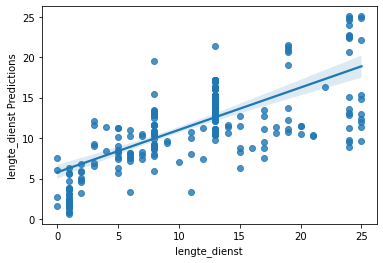

In [1289]:
# Create subset X of possibly predictive features (filter out metadata)
X = data[['indiensttreding_leeftijd', 'geslacht', 'afdeling', 'BUSINESS_UNIT', 'stad']]

# Create dummies for categorical variables
X = pd.get_dummies(X, columns=['geslacht', 'BUSINESS_UNIT'], drop_first = True)
X = pd.get_dummies(X, columns=['afdeling', 'stad'], drop_first = False)

y = data['lengte_dienst']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RS)

reg = LinearRegression()
reg.fit(X_train, y_train)
print("R", reg.score(X_test, y_test))

predictions = reg.predict(X_test)

ax = sns.regplot(x = y_test, y = predictions)
ax.set(ylabel = "lengte_dienst Predictions")
plt.show()

In [1290]:
pd.DataFrame(np.append(reg.intercept_, reg.coef_), pd.Index(['intercept']).append(X.columns), columns=['Value'])

,Value
intercept,3.282810
indiensttreding_leeftijd,0.198143
geslacht_Vrouw,1.765361
BUSINESS_UNIT_Intern,10.761187
afdeling_Accountant,-0.322080
afdeling_Administratief medewerker,-0.382665
afdeling_BI,-4.888254
afdeling_Boekhouder,-2.276455
afdeling_Business analist,0.015021
afdeling_Business development,-0.536995


In [1291]:
scores = cross_val_score(reg, X, y, cv = 5)
print("R2 score for each cross-validation fold:", scores)
print("Mean R2 score:", scores.mean())

R2 score for each cross-validation fold: [0.4542327  0.49304095 0.41480366 0.48533587 0.49955422]
Mean R2 score: 0.46939347845156715


## Predicting uitdiensttreding_type

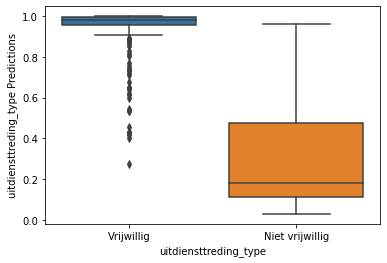

In [1292]:
y = data['uitdiensttreding_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RS)

# Use penalty l1 to make it possible for coefficients of non-predictive features to have a value of 0
clf = LogisticRegression(penalty = 'l1', C = 1, solver = 'liblinear', random_state = RS)
clf.fit(X_train, y_train)

predictions = clf.predict_proba(X_test)[:,1]

ax = sns.boxplot(x = y_test, y = predictions)
ax.set(ylabel = "uitdiensttreding_type Predictions")
plt.show()

In [1293]:
pd.DataFrame(np.append(clf.intercept_, clf.coef_), pd.Index(['intercept']).append(X.columns), columns=['Value'])

,Value
intercept,0.462452
indiensttreding_leeftijd,0.112958
geslacht_Vrouw,0.033484
BUSINESS_UNIT_Intern,0.844029
afdeling_Accountant,-0.781282
afdeling_Administratief medewerker,0.000000
afdeling_BI,0.238035
afdeling_Boekhouder,0.203618
afdeling_Business analist,0.000000
afdeling_Business development,0.000000


In [1294]:
scores = cross_val_score(clf, X, y, cv = 5, scoring = 'roc_auc')
print("AUC score for each cross-validation fold:", scores)
print("Mean AUC score:", scores.mean())

AUC score for each cross-validation fold: [0.94800801 0.97688715 0.9754522  0.95310556 0.95818696]
Mean AUC score: 0.9623279756497658
